# Word count and analysis with RegEx

We're going to firstly import some of the libraries

In [1]:
import re
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

Open the raw file and read it, making sure it's a normal string.

In [2]:
with open("corpus/simplewiki.txt") as f:
    raw_corpus = f.read()

In [3]:
type(raw_corpus)

str

We then use [regular expression](https://developer.mozilla.org/th/docs/Web/JavaScript/Guide/Regular_Expressions) to match and segment the words.

![regex](https://imgs.xkcd.com/comics/regular_expressions.png)

*(Courtesy: [Regular Expression, xkcd](https://imgs.xkcd.com/comics/regular_expressions.png))*

We'll use some simple regular expression `[a-zA-Z]+[\-[a-zA-Z]+]*` which means to find words without numbers, and consider the hyphenated words (like 'all-in-one') to be one single word.

In [4]:
segmented_corpus = re.findall("[a-zA-Z]+[\-[a-zA-Z]+]*", raw_corpus)

Convert them to lower letters

In [5]:
segmented_corpus = [i.lower() for i in segmented_corpus]

Count their frequency, and transform them to Pandas DataFrame

In [6]:
word_dict = dict(Counter(segmented_corpus))

In [7]:
words = list(word_dict.keys())
counts = [word_dict[i] for i in words]

In [8]:
word_count = pd.DataFrame({"word": words, "count": counts})

The full word count is now in the `word_count` variable. We hereby trim some of its very first rows:

In [9]:
word_count.head(10)

,word,count
0,the,262494
1,pelvis,42
2,plural,121
3,pelves,2
4,is,67683
5,part,3733
6,of,137781
7,vertebrate,53
8,body,1808
9,to,81043


Finally we count the frequency of occurrences...

In [10]:
frequencies = word_count["count"].value_counts().sort_index()

In [11]:
frequencies

1         83551
2         22269
3         10636
4          6586
5          4379
6          3346
7          2629
8          2066
9          1804
10         1439
11         1235
12         1122
13          945
14          873
15          794
16          674
17          648
18          580
19          554
20          518
21          463
22          426
23          409
24          320
25          341
26          342
27          307
28          285
29          242
30          248
          ...  
13045         1
13370         1
13590         1
15388         1
16490         1
16511         1
16536         1
17083         1
17888         1
20256         1
21738         1
22015         1
22959         1
23517         1
24779         1
25547         1
26299         1
26525         1
27601         1
30201         1
31777         1
34447         1
38284         1
41779         1
67683         1
81043         1
101300        1
103348        1
137781        1
262494        1
Name: count, Length: 120

...and plot them (although unnicely)

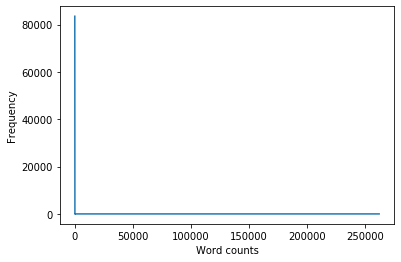

In [12]:
plt.plot(frequencies)
plt.xlabel("Word counts")
plt.ylabel("Frequency")
plt.show()